In [ ]:
import matplotlib.pyplot as plt  # Pour la visualisation
import numpy as np  # Pour la manipulation des tableaux
import pandas as pd  # Pour le traitement des données tabulaires (optionnel)
import tensorflow as tf  # Pour le deep learning
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [ ]:
img_height, img_width = IMG_SIZE = (200, 200)
batch_size = 32
from google.colab import drive
drive.mount('/content/drive')

# Accéder aux fichiers dans le dossier
import os
path = "/content/drive/My Drive/seven_plastics/seven_plastics"
os.listdir(path)  # Afficher le contenu du dossier

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['1_polyethylene_PET',
 '2_high_density_polyethylene_PE-HD',
 '3_polyvinylchloride_PVC',
 '4_low_density_polyethylene_PE-LD',
 '5_polypropylene_PP',
 '6_polystyrene_PS',
 '7_other_resins',
 '8_no_plastic']

In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
train_ds = image_dataset_from_directory(
  path,
  validation_split=0.1,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1936 files belonging to 8 classes.
Using 1743 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  path,
  validation_split=0.1,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1936 files belonging to 8 classes.
Using 193 files for validation.


In [ ]:
# List the classes

class_names = train_ds.class_names
print(class_names)

['1_polyethylene_PET', '2_high_density_polyethylene_PE-HD', '3_polyvinylchloride_PVC', '4_low_density_polyethylene_PE-LD', '5_polypropylene_PP', '6_polystyrene_PS', '7_other_resins', '8_no_plastic']


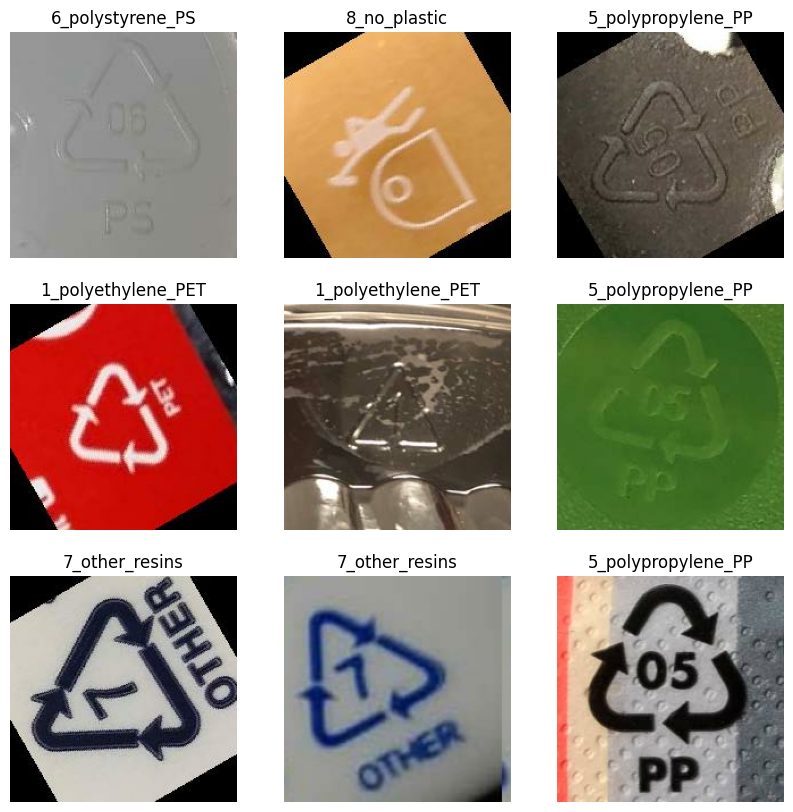

In [ ]:
# Get a look at what we are training on

image_batch, label_batch = next(iter(train_ds))

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].numpy().astype("uint8"))
  label = label_batch[i]
  plt.title(class_names[label])
  plt.axis("off")

In [1]:
model.summary()

NameError: name 'model' is not defined

In [ ]:
import tensorflow as tf

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomContrast(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomBrightness(0.2),  # Randomly change brightness
    tf.keras.layers.RandomHeight(0.2),      # Random height shift
    tf.keras.layers.RandomWidth(0.2),       # Random width shift
    tf.keras.layers.RandomCrop(height=200, width=200),  # Random crop of the image
    tf.keras.layers.RandomTranslation(height_factor=0.2, width_factor=0.2)  # Random translation
])











In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
base_model = ResNet50(input_shape=(img_height, img_width, 3), include_top=False, weights='imagenet')

In [ ]:
# Geler les couches du modèle de base pour éviter de les réentraîner
base_model.trainable = False

# Ajouter des couches personnalisées pour la classification
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(class_names), activation='softmax')  # Nombre de classes
])

# Compiler le modèle
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entraîner le modèle
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10  # Nombre d'époques
)




Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 245s 4s/step - accuracy: 0.3551 - loss: 1.8314 - val_accuracy: 0.4974 - val_loss: 1.4352
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 232s 4s/step - accuracy: 0.5973 - loss: 1.0470 - val_accuracy: 0.5596 - val_loss: 1.1863
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 281s 4s/step - accuracy: 0.7097 - loss: 0.7681 - val_accuracy: 0.6010 - val_loss: 1.1038
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 242s 4s/step - accuracy: 0.7806 - loss: 0.6290 - val_accuracy: 0.6373 - val_loss: 1.0388
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 227s 4s/step - accuracy: 0.8474 - loss: 0.4885 - val_accuracy: 0.6477 - val_loss: 1.0707
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 240s 4s/step - accuracy: 0.8448 - loss: 0.4523 - val_accuracy: 0.6891 - val_loss: 0.9769
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 259s 4s/step - accuracy: 0.8688 - loss: 0.3809 - val_accuracy: 0.6114 - val_loss: 0.9541
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 259s 4s/step - accuracy: 0.8968 - loss: 0.3118 - val_accuracy: 0.6839 - v

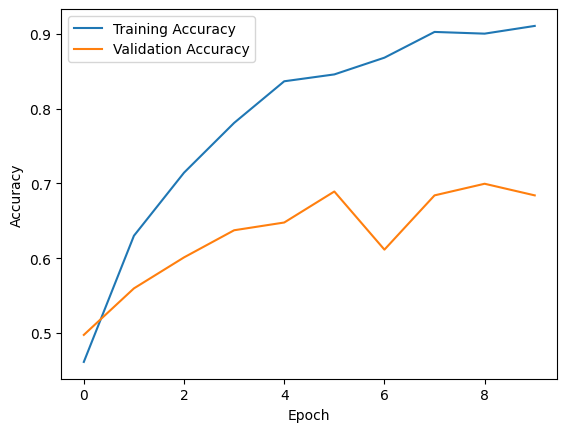

In [ ]:
# Visualiser les résultats
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Found 1936 files belonging to 8 classes.
Using 1549 files for training.
Found 1936 files belonging to 8 classes.
Using 387 files for validation.
Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 132s 3s/step - accuracy: 0.3386 - loss: 1.7371 - val_accuracy: 0.5917 - val_loss: 1.1579
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 121s 2s/step - accuracy: 0.6586 - loss: 0.9775 - val_accuracy: 0.6331 - val_loss: 0.9933
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.7251 - loss: 0.7666 - val_accuracy: 0.6667 - val_loss: 0.9118
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 146s 2s/step - accuracy: 0.7720 - loss: 0.6415 - val_accuracy: 0.7003 - val_loss: 0.8530
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.8029 - loss: 0.5464 - val_accuracy: 0.7106 - val_loss: 0.8464
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.8344 - loss: 0.4778 - val_accuracy: 0.7106 - val_loss: 0.8198
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 106s 2s

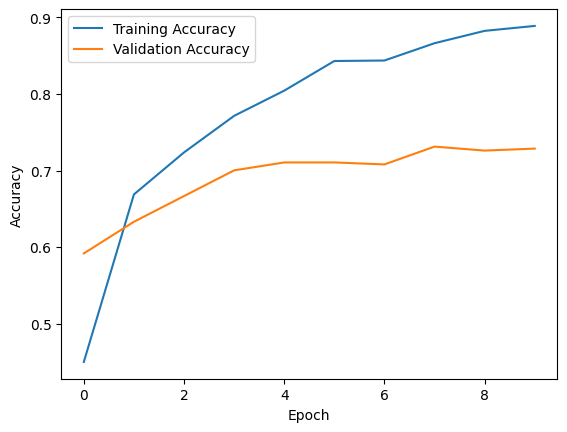

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Sequential

# Charger EfficientNetB0
base_model = EfficientNetB0(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False

# Créer le modèle
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(class_names), activation='softmax'))  # Remplacez num_classes par le nombre de vos classes

# Compiler le modèle
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Charger les données
train_ds = tf.keras.utils.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(224, 224),
    batch_size=32,
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(224, 224),
    batch_size=32,
)

# Appliquer preprocess_input spécifique à EfficientNet
train_ds = train_ds.map(lambda x, y: (preprocess_input(x), y))
val_ds = val_ds.map(lambda x, y: (preprocess_input(x), y))

# Optimiser les performances
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Entraîner le modèle
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

# Afficher les courbes d'apprentissage
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.layers import Dropout  # Ajoutez cette ligne

# Augmentation de données
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
])

# Modèle avec régularisation et Dropout
model = Sequential([
    data_augmentation,
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.5),  # Utilisation de Dropout
    Dense(len(class_names), activation='softmax')
])

# Compiler avec un taux d'apprentissage plus petit
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Early Stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=3, restore_best_weights=True
)

# Entraîner le modèle
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=[early_stopping]
)

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 122s 2s/step - accuracy: 0.2935 - loss: 4.0148 - val_accuracy: 0.5426 - val_loss: 2.9578
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - accuracy: 0.5684 - loss: 2.7223 - val_accuracy: 0.5943 - val_loss: 2.2577
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 103s 2s/step - accuracy: 0.6334 - loss: 2.0757 - val_accuracy: 0.6512 - val_loss: 1.8201
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 103s 2s/step - accuracy: 0.6626 - loss: 1.7094 - val_accuracy: 0.6873 - val_loss: 1.5417
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - accuracy: 0.7143 - loss: 1.4031 - val_accuracy: 0.6925 - val_loss: 1.3518
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.7226 - loss: 1.2068 - val_accuracy: 0.7209 - val_loss: 1.2475
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 105s 2s/step - accuracy: 0.7376 - loss: 1.0732 - val_accuracy: 0.7106 - val_loss: 1.1710
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - accuracy: 0.7582 - loss: 1.0141 - val_accuracy: 0.7209 - v

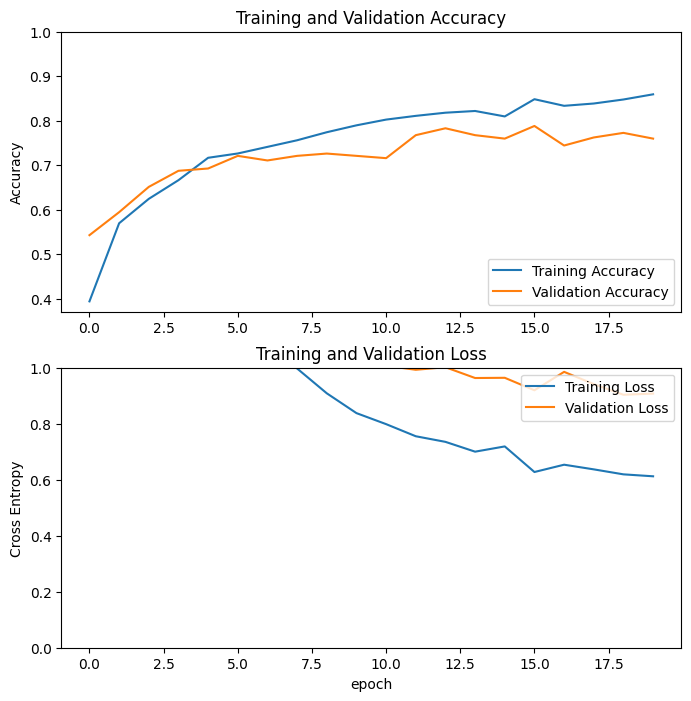

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
export_path = "/content/drive/My Drive/PFA/resin_id_model.h5"
model.save(export_path)
print(f"✅ Modèle enregistré sous : {export_path}")

✅ Modèle enregistré sous : /content/drive/My Drive/PFA/resin_id_model.h5
